In [ ]:


def gram_schmidt(A):
    m, n = A.shape
    Q = np.zeros((m, n))
    R = np.zeros((n, n))

    for j in range(n):
        v = A[:, j]
        for i in range(j):
            R[i, j] = np.dot(Q[:, i].T, A[:, j])
            v = v - R[i, j] * Q[:, i]
        R[j, j] = np.linalg.norm(v)
        Q[:, j] = v / R[j, j]

    return Q, R

# Example usage
A = np.array([[1, 3, 1], [1, 3, 7], [1, -1, -4], [1, -1, 2]])
Q, R = gram_schmidt(A)

print("Matrix Q:")
print(Q)
print("\nMatrix R:")
print(R)

Matrix Q:
[[ 0.5  0.5 -0.5]
 [ 0.5  0.5  0.5]
 [ 0.5 -0.5 -0.5]
 [ 0.5 -0.5  0.5]]

Matrix R:
[[2. 2. 3.]
 [0. 4. 5.]
 [0. 0. 6.]]


In [ ]:
import numpy as np

# Matrix A
A = np.array([[1, 3, 1], [1, 3, 7], [1, -1, -4], [1, -1, 2]])

# Perform full QR decomposition
Q, R = np.linalg.qr(A, mode='reduced')

print("Matrix Q:")
print(Q)
print("\nMatrix R:")
print(R)

# Perform full QR decomposition
Q, R = np.linalg.qr(A, mode='complete')

print("Matrix Q:")
print(Q)
print("\nMatrix R:")
print(R)

Matrix Q:
[[-0.5 -0.5  0.5]
 [-0.5 -0.5 -0.5]
 [-0.5  0.5  0.5]
 [-0.5  0.5 -0.5]]

Matrix R:
[[-2. -2. -3.]
 [ 0. -4. -5.]
 [ 0.  0. -6.]]
Matrix Q:
[[-0.5 -0.5  0.5  0.5]
 [-0.5 -0.5 -0.5 -0.5]
 [-0.5  0.5  0.5 -0.5]
 [-0.5  0.5 -0.5  0.5]]

Matrix R:
[[-2. -2. -3.]
 [ 0. -4. -5.]
 [ 0.  0. -6.]
 [ 0.  0.  0.]]


In [1]:
import numpy as np

# Define the matrix A
A = np.array([[2, -1, 0],
              [-1, 2, -1],
              [0, -1, 2]])

# Calculate eigenvalues and eigenvectors
eigenvalues, eigenvectors = np.linalg.eig(A)

# Print the results
print("Eigenvalues:")
print(eigenvalues)
print("\nEigenvectors (each column corresponds to an eigenvalue):")
print(eigenvectors)


Eigenvalues:
[3.41421356 2.         0.58578644]

Eigenvectors (each column corresponds to an eigenvalue):
[[-5.00000000e-01 -7.07106781e-01  5.00000000e-01]
 [ 7.07106781e-01  4.05925293e-16  7.07106781e-01]
 [-5.00000000e-01  7.07106781e-01  5.00000000e-01]]


In [2]:
2-np.sqrt(8)

-0.8284271247461903

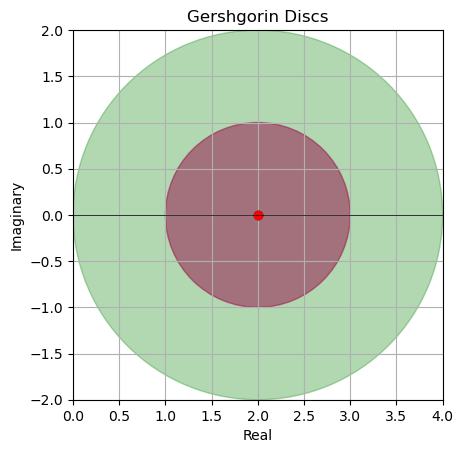

In [1]:
import numpy as np
import matplotlib.pyplot as plt

def gershgorin_plot(matrix):
    n = len(matrix)
    centers = np.diag(matrix)
    radii = np.sum(np.abs(matrix), axis=1) - np.abs(centers)

    # Define colors for the discs
    colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k']

    fig, ax = plt.subplots()

    for i in range(n):
        color = colors[i % len(colors)]  # Select color cyclically
        circle = plt.Circle((centers[i], 0), radii[i], color=color, alpha=0.3)
        ax.add_artist(circle)
        ax.plot(centers[i], 0, 'o', color=color)  # Plot the center of each disc with the same color

    ax.set_aspect('equal', 'box')
    ax.autoscale()
    ax.axhline(0, color='k', lw=0.5)
    ax.axvline(0, color='k', lw=0.5)
    ax.set_title("Gershgorin Discs")
    plt.xlabel('Real')
    plt.ylabel('Imaginary')
    plt.grid(True)

    # Set the limits to show the entire discs
    max_radius = max(radii)
    ax.set_xlim(min(centers) - max_radius, max(centers) + max_radius)
    ax.set_ylim(-max_radius, max_radius)

    plt.show()

# Example usage:
matrix = np.array([[5, 1, 0], [1, 4, 1], [0, 1, 3]])  # Your matrix here
matrix = np.array([[2, -1, 0],
              [-1, 2, -1],
              [0, -1, 2]])
gershgorin_plot(matrix)

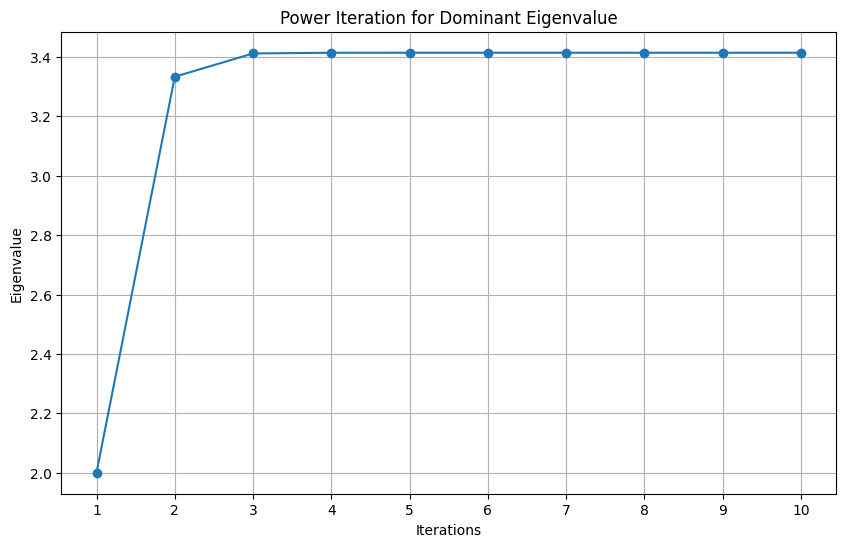

Final Dominant Eigenvalue: 3.4142135623730483
Final Dominant Eigenvector: [ 0.50000006 -0.70710669  0.50000006]


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Define the matrix
A = np.array([[2, -1, 0],
              [-1, 2, -1],
              [0, -1, 2]])

# Initial guess for the eigenvector
v = np.array([1, 1, 1])

# Number of iterations
num_iterations = 10

# Lists to store eigenvalues and eigenvectors for plotting
eigenvalues = []
eigenvectors = []

# Power iteration
for i in range(num_iterations):
    # Power iteration step
    v = np.dot(A, v)

    # Normalize the eigenvector
    v = v / np.linalg.norm(v)

    # Compute the eigenvalue
    eigenvalue = np.dot(np.dot(v, A), v) / np.dot(v, v)

    # Store eigenvalues and eigenvectors
    eigenvalues.append(eigenvalue)
    eigenvectors.append(v)

# Plotting
plt.figure(figsize=(10, 6))
plt.title('Power Iteration for Dominant Eigenvalue')
plt.xlabel('Iterations')
plt.ylabel('Eigenvalue')
plt.plot(range(1, num_iterations + 1), eigenvalues, marker='o', linestyle='-')
plt.grid(True)
plt.xticks(range(1, num_iterations + 1))
plt.show()

# Display the final eigenvalue and eigenvector
print("Final Dominant Eigenvalue:", eigenvalues[-1])
print("Final Dominant Eigenvector:", eigenvectors[-1])


In [ ]:
pip install yfinance

In [ ]:
import yfinance as yf
import numpy as np
import pandas as pd

# Define the ticker symbols for the assets in your portfolio
tickers = ['AAPL', 'XOM', 'JNJ', 'JPM', 'KO']

# Fetch historical data
data = yf.download(tickers, start='2023-01-01', end='2024-01-01')['Adj Close']

# Calculate daily returns
returns = data.pct_change().dropna()

# Calculate the variance-covariance matrix
cov_matrix = returns.cov()

# Compute eigenvalues and eigenvectors
eigenvalues, eigenvectors = np.linalg.eig(cov_matrix)

# Display the eigenvalues
print("Eigenvalues:")
print(eigenvalues)

# Display the eigenvectors
print("\nEigenvectors:")
print(eigenvectors)


/usr/local/lib/python3.10/dist-packages/yfinance/base.py:48: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  _empty_series = pd.Series()
[*********************100%%**********************]  5 of 5 completed

Eigenvalues:
[3.21274831e-04 1.71378867e-04 5.16121746e-05 1.00123508e-04
 1.11213811e-04]

Eigenvectors:
[[-0.29898068 -0.71036126  0.08641273  0.41391528  0.47665964]
 [-0.20360553 -0.21390761  0.46772068  0.28827577 -0.78161549]
 [-0.54584663 -0.27153742  0.01750807 -0.78985643 -0.06433633]
 [-0.15458532 -0.18418337 -0.87943838  0.18070532 -0.36893575]
 [-0.73980414  0.58478571  0.00719825  0.29840178  0.14703761]]
